In [2]:
!git clone https://github.com/TiagoVitali/Analise-de-dados-com-Pandas-e-Python.git

fatal: destination path 'Analise-de-dados-com-Pandas-e-Python' already exists and is not an empty directory.


In [3]:
import pandas as pd

In [4]:
df1 = pd.read_excel("Analise-de-dados-com-Pandas-e-Python/Aracaju.xlsx")
df2 = pd.read_excel("Analise-de-dados-com-Pandas-e-Python/Fortaleza.xlsx")
df3 = pd.read_excel("Analise-de-dados-com-Pandas-e-Python/Natal.xlsx")
df4 = pd.read_excel("Analise-de-dados-com-Pandas-e-Python/Recife.xlsx")
df5 = pd.read_excel("Analise-de-dados-com-Pandas-e-Python/Salvador.xlsx")

In [5]:
df = pd.concat([df1, df2, df3, df4, df5])

In [6]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [7]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [8]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
68,Aracaju,2018-01-01,179.74,1520,2
201,Salvador,2019-01-02,86.61,1036,1
229,Salvador,2019-01-02,43.08,1036,2
0,Recife,2019-01-01,162.61,981,1
133,Fortaleza,2019-03-02,14.67,980,7


In [9]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [10]:
df["LojaID"] = df["LojaID"].astype('int64')
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [11]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [12]:
df['Data'] = pd.to_datetime(df['Data'])
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [13]:
df.groupby(df['Data'].dt.year)['Vendas'].sum()

Data
2018    31456.67
2019    78158.28
Name: Vendas, dtype: float64

In [14]:
df['Ano_Venda'] = df['Data'].dt.year
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Ano_Venda
0,Aracaju,2018-01-01,142.00,1520,1,2018
1,Aracaju,2018-01-01,14.21,1522,6,2018
2,Aracaju,2018-01-01,71.55,1520,1,2018
3,Aracaju,2018-01-01,3.01,1521,7,2018
4,Aracaju,2018-01-01,24.51,1522,8,2018


# Visualizacao de dados - matplotlib

Matplotlib is building the font cache; this may take a moment.


<Axes: xlabel='LojaID'>

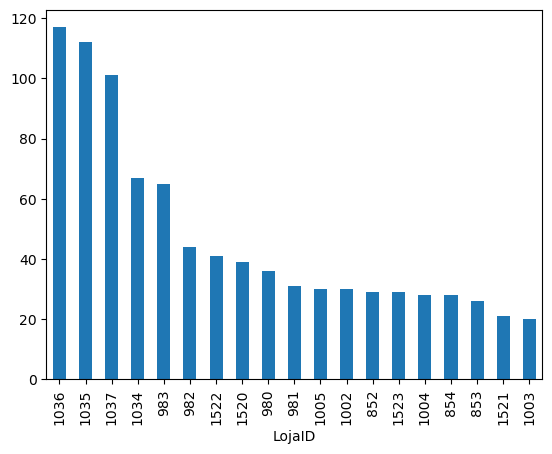

In [24]:
df['LojaID'].value_counts(ascending=False).plot.bar()

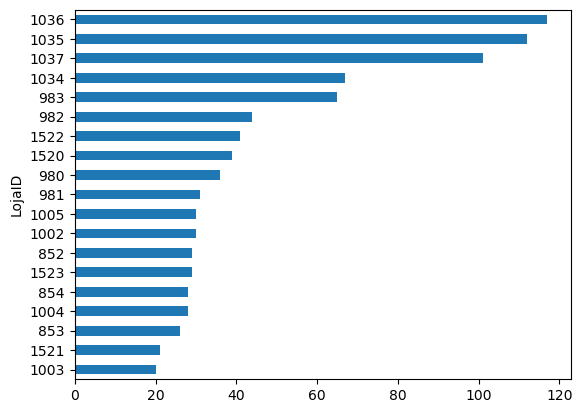

In [30]:
df['LojaID'].value_counts(ascending=True).plot.barh();

<Axes: ylabel='Vendas'>

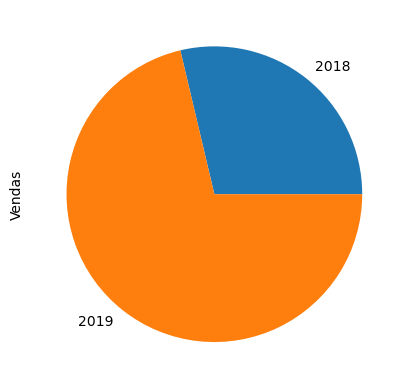

In [36]:
df.groupby(df['Data'].dt.year)['Vendas'].sum().plot.pie()

Text(0, 0.5, 'Vendas')

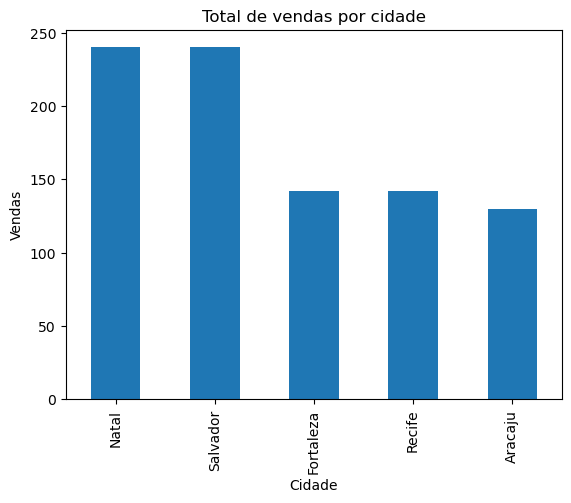

In [50]:
import matplotlib.pyplot as plt
df['Cidade'].value_counts().plot.bar(title='Total de vendas por cidade')
plt.xlabel('Cidade')
plt.ylabel('Vendas')

Text(0, 0.5, 'Vendas')

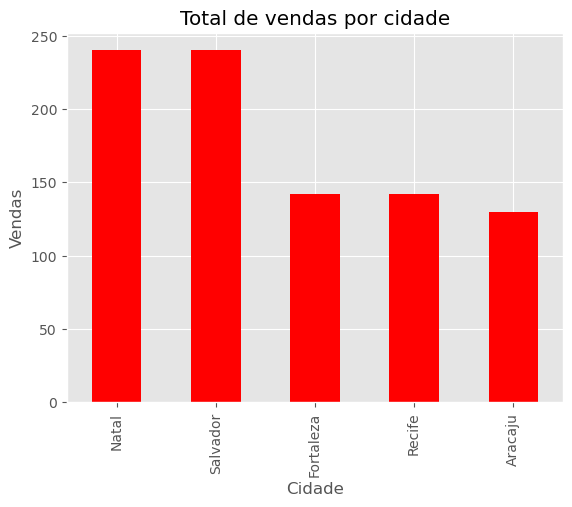

In [58]:
import matplotlib.pyplot as plt
df['Cidade'].value_counts().plot.bar(title='Total de vendas por cidade', color='red')
plt.xlabel('Cidade')
plt.ylabel('Vendas')

In [56]:
plt.style.use('ggplot')

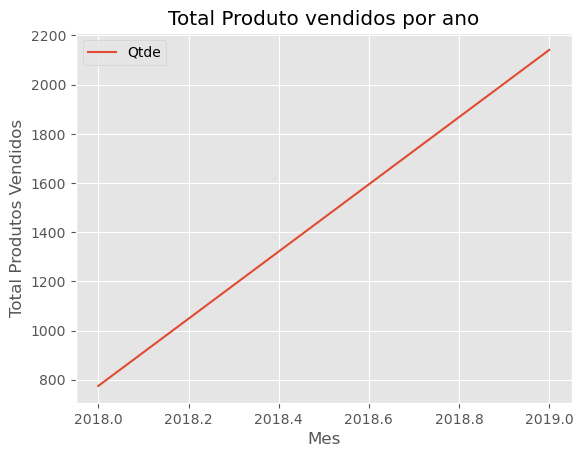

In [68]:
df.groupby(df['Ano_Venda'])['Qtde'].sum().plot(title='Total Produto vendidos por ano')
plt.xlabel('Mes')
plt.ylabel('Total Produtos Vendidos')
plt.legend()

(array([191., 193., 221.,  85.,  54.,  61.,  38.,  31.,  14.,   6.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

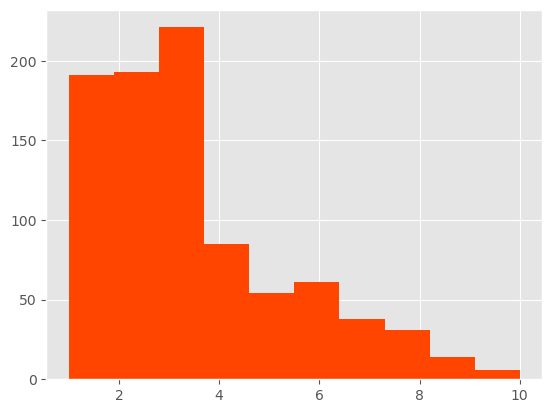

In [76]:
plt.hist(df['Qtde'], color='orangered')

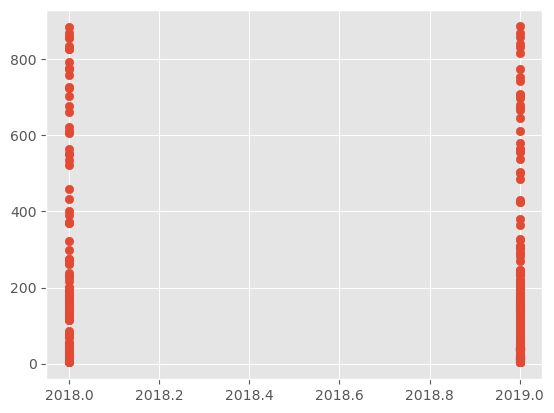

In [78]:
plt.scatter(x=df['Ano_Venda'], y=df['Vendas'])

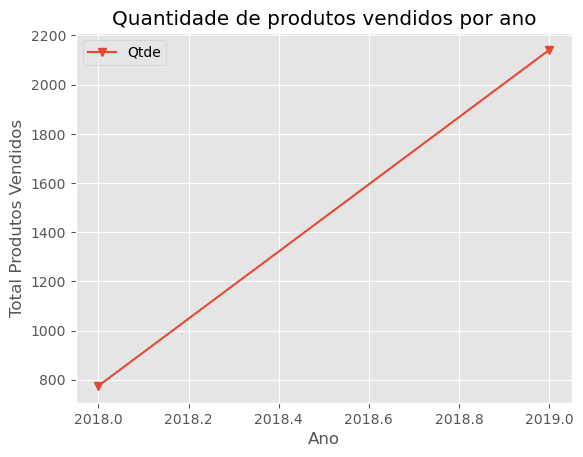

In [84]:
df.groupby(df['Ano_Venda'])['Qtde'].sum().plot(marker = 'v')
plt.title('Quantidade de produtos vendidos por ano')
plt.xlabel('Ano')
plt.ylabel('Total Produtos Vendidos')
plt.legend()
plt.savefig('grafico_quantiadadexmes.png')